# 선형 모델
> + 선형 모델: 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.

### 회귀의 선형 모델

**일반화 모델** 
> y^ = w[0]*x[0]+ w[1]*x[1] + ... + w[p]*x[p] + b
+ w는 각 특성에 해당하는 기울기
+ 즉, w의 각 가중치를 곱해서 다 더한 **가중치의 합**으로 볼 수 있다. 

**1차원 wave데이터셋으로 직선처럼 되도록 학습시킨 결과**

w[0]: 0.393906  b: -0.031804


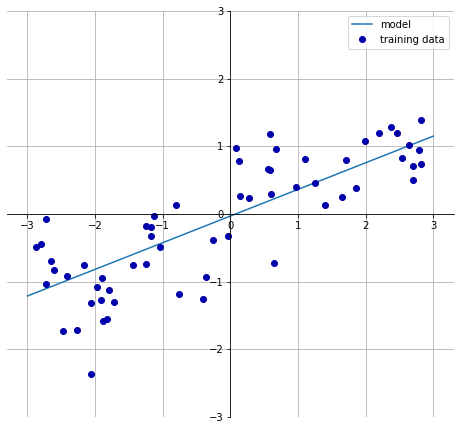

In [33]:
import mglearn
mglearn.plots.plot_linear_regression_wave()

> 특성이 1->직선, 2-> 평면, 더 많음 -> 초평면
+ **훈련 데이터보다 특성이 더 많은 경우엔 어떤 타깃 y도 선형 함수로 모델링할 수 있다.** --> 의미파악 잘 못하겠음(특성이 많으면 많을 수록 선형 모델이 매우 좋은 성능을 띄는 거랑 관련?
+ 훈련 데이터로부터 모델 파라미터 w와 b를 학습한느 방법과 모델의 복잡도를 제어하는 방법에서 차이가 있는 선형 모델들이 있음

### 선형 회귀(최소제곱법)
> 예측과 훈련 세트에 있는 타깃 y 사이의 **평균제곱오차**를 최소화 하는 파라미터 w와 b를 찾는다. 
> **평균제곱오차** : 예측값과 타깃값의 차이를 제곱하여 샘플의 개수로 나눈 것
> 선형 회귀는 매개변수가 없어 모델의 복잡도를 제어할 수 없다. 


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples = 60) #60개의 샘픔 데이터를 만든다. 
#wave 데이터셋은 입력 특성 하나와 모델링한 타깃 변수를 가진다. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) #42이에 맞는 난수를 기준으로 섞어 분할한다.
lr = LinearRegression().fit(X_train, y_train) #선형 모델로 학습시킨다.

print("lr.coef_:", lr.coef_) #numpy배열로 출력(특성이 하나임)
print("lr.intercept_:", lr.intercept_) #실수값으로 하나 나옴

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


+ coef_ : 가중치, 계수라고 하며 각 입력 특성에 대응되는 numpy배열이다. 
+ intercept_ : 절편을 나타내며 실수하나의 값을 갖는다. 

In [35]:
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train))) #훈련에 대한 정확도
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test, y_test))) #테스트에 대한 정확도
##과소 적합이 일어남 --> 특성이 하나(모델이 매우 단순하다.)

훈련 세트 점수:0.67
테스트 세트 점수:0.66


In [36]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train) #선형모델로 학습시킴
print("훈련 세트 점수:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lr.score(X_test, y_test)))
##훈련세트에서만 높은 점수 --> 특성이 104개나 됨(모델이 매우 복잡함) -> 과대적합이 일어나서 훈련세트에만 좋은 성능을 띔.


훈련 세트 점수:0.95
테스트 세트 점수:0.61


+ 위와 같이 복잡도를 제어를 할 수없다. --> 극복하기 위해 **리지 회귀**를 사용함

### 리지 회귀

+ 회귀를 위한 선형 모델, 최소적합법에서 사용한 것과 같은 예측 함수 사용
+ 가중치의 절댓값을 가능한 한 작게 만드는 것이 목표(0에 가깝게) : **규제**  -> 특성이 출력에 주는 영향을 최소화 시킨다.
+ **L2규제 사용** --> 과대적합이 되지 않도록 리지 회귀에서 사용하는 규제


In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) #alpha = 1
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge.score(X_test, y_test)))



훈련 세트 점수:0.89
테스트 세트 점수:0.75


+ linearRegression과 ridge를 비교해보면 ridge가 훈련데이터에 대해서는 낮지만 테스트 세트의 점수에서는 보다 더 높은 점수를 띈다. 
+ alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있다. 
>> + alpha가 크면 0에 가깝게 가중치를 만든다. --> 훈련세트에 대해서 정확도가 떨어질 수 있음
>> + alpha가 작으면 linearRegression과 비슷하게 모델이 단순해져 과대적합 발생


In [38]:
#alpha를 10으로 두었을때
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge10.score(X_test, y_test)))
#alpha를 0.1로 두었을 때
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수:0.79
테스트 세트 점수:0.64
훈련 세트 점수:0.93
테스트 세트 점수:0.77


**alpha값과 coef_ 속성의 연관**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

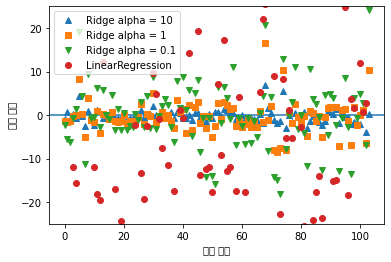

In [39]:
import matplotlib.pyplot as plt
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")

plt.plot(lr.coef_,'o', label = "LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim() 
plt.hlines(0, xlims[0], xlims[1])#???????????/
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

+ 각각 0에 가까운 것은 ridge10 -> ridge -> ridge01 -> linearregression 순인 것을 알 수 있다. 

**규제의 또 다른 방법 : alpha값을 그대로 두고 훈련 데이터의 크기를 조절한다.**
+ **학습 곡선** : 데이터셋의 크기에 따른 모델의 성능 변화를 그래프로 나타낸것

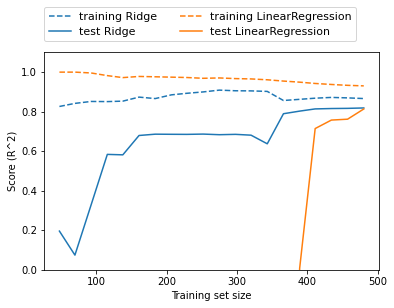

In [40]:
mglearn.plots.plot_ridge_n_samples()

**그래프 관찰**
+ 400이하의 데이터 크기에는 리지회귀가 성능이 더좋다. 그에 비해 선형 회귀는 어떠한 것도 학습하지 못함
+ 데이터가 많아질 수록 선형회귀가 리지회귀와 성능이 비슷해진다. --> 데이터가 충분히 주어지면 규제 항은 덜 중요해진다.
+ 선형 회귀의 훈련 데이터 성능이 점차 줄어든다. --> 데이터가 많아질수록 모델이 데이터를 기억하고, 과대적합하기 어려워진다. 


### 라소

+ 선형 회귀에 규제 적용의 Ridge의 대안 Lasso
+ L1규제라고도 하며 계수를 0과 가깝게 한다. 
+ 계수를 0으로 하여 특성을 제외 시킬 수도 있다. --> 모델이 간단해 진다. 

In [41]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}.".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso.coef_!=0)) #coef_ : 각 특성마다의 가중치값, 즉, coef 배열의 길이는 특성의 개수

훈련 세트 점수 : 0.29.
테스트 세트 점수:0.21
사용한 특성의 개수 4


> 특성 104개중 4개만 사용되었다는 것을 알 수 있다. 
> max_iter(반복 실행하는 횟수) 

In [42]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("훈련 세트 점수:{:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ !=0))
# 특성이 104에서 33개로 변화한다. 

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 개수: 33


In [43]:
lasso00001 = Lasso(alpha= 0.0001, max_iter = 100000).fit(X_train, y_train)#alpha를 너무 작게줌 --> 과대적합 생길 수도 있음
print("훈련 세트 점수:{:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수:{:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수", np.sum(lasso00001.coef_ != 0)) # 특성의 개수가 104 ->96

# 여기서 예상 하건데 alpha가 높아지면 계수를 0 으로 만드는 반면에 특성을 줄인다. 

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 개수 96


Text(0, 0.5, '계수 크기')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

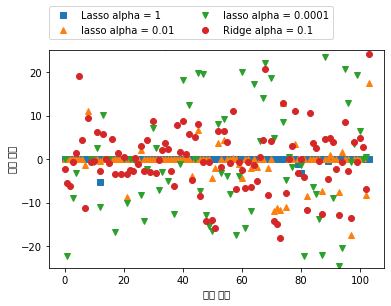

In [44]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc = (0,1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

그래프를 보면 0.0001의 alpha값 말고는 대부분 0에 가깝거나 0으로 특성의 계수가 주어진 것을 볼 수 있다. 
+ scikit_learn은 Lasso와 Ridge의 페널티를 결합흔 ElasticNet을 제공한다 


### 분류용 선형 모델

> 이진분류
> y^ > 0
+ 특성들의 가중치 합을 임계치 0과 비교하여 작으면 -1 클래스, 크면 1클래스라고 예측한다. 
+ 분류형 선형 모델에서는 **결정 경계**가 입력의 선형 함수이다. --> 두개의 클래스로 구분하는 분류기

#### 선형 모델 학습 방법
+ 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
+ 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지 

#### 선형 분류 알고리즘 
+ 로지스틱 회귀(linear_model.LogisticRegresson)
+ 서포트 벡터 머신(svm.LinearSVC)


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


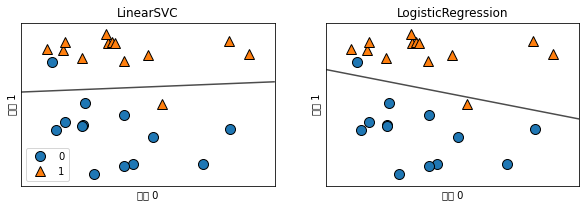

In [45]:
from sklearn.linear_model import LogisticRegression #로지스틱 사용
from sklearn.svm import LinearSVC #서포트 벡터머신 사용

X,y = mglearn.datasets.make_forge() # forge는 인위적으로 만든 두개의 특성을 가진 이진분류 데이터셋이다.

fig, axes = plt.subplots(1,2, figsize = (10,3)) #서브 플롯을 1행에 2열 만듬

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = 0.5, ax= ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()



> + 두 모델은 기본적으로 L2규제를 사용한다. 
> + 규제의 강도를 결정하는 매개변수는 C이고, C가 높으면 규제가 감소한다. 
> + C의 값이 낮아지면 데이터 포인트 중 다수에 맞추고, 높이면 개개의 데이터 포인트를 정확히 분류하려고 노력한다. 


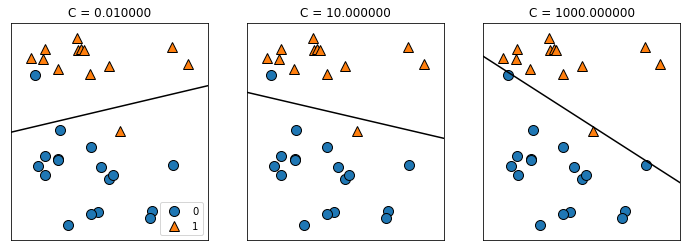

In [46]:
mglearn.plots.plot_linear_svc_regularization()

> + 왼쪽은 c의 값이 매우 작아 규제가 많이 적용됨 -> 경계선이 수평에 가깝다. 
> + 오른쪽은 c의 값이 커서 규제가 적게 적용됨 -> 과대적합(훈련데이터에서만 높다.)
+ 저차원에서는 분류에서의 선형모델이 제한적인 것처럼 보임, 고차원에서는 특성이 많아지면서 과대적합이 되지 않도록 하는 것이 중요


In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

#훌륭한 성과이지만 과소적합 (훈련 세트 점수와 테스트 세트 점수가 비슷함)

훈련 세트 점수: 0.941
테스트 세트 점수: 0.965


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train) #규제 값을 넣어줌
print("훈련 세트 점수:{:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg100.score(X_test, y_test)))

# 정확도가 높아짐 --> 모델이 복잡해지면 성능이 좋다. 

훈련 세트 점수:0.951
테스트 세트 점수:0.958


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train) #규제 값을 넣어줌
print("훈련 세트 점수:{:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수:{:.3f}".format(logreg001.score(X_test, y_test)))

#c의 값을 적게하면 기본값보다 더 과소적합

훈련 세트 점수:0.937
테스트 세트 점수:0.930


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

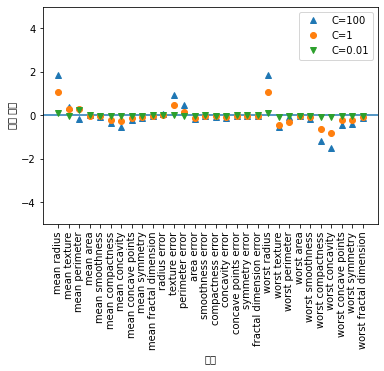

In [50]:
plt.plot(logreg100.coef_.T, '^', label = "C=100")
plt.plot(logreg.coef_.T, 'o', label = "C=1")
plt.plot(logreg001.coef_.T, 'v', label = "C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation= 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

**L1 규제를 사용**

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 :0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 :0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 :0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 :0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 :0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 :0.98


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

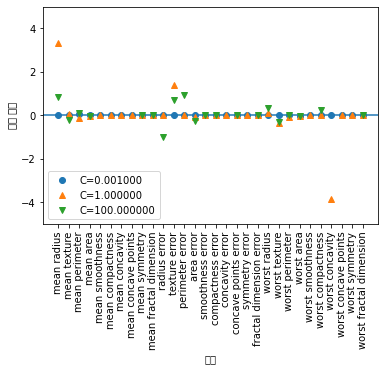

In [53]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']):
    lr_l1 = LogisticRegression(solver = 'liblinear', C=C, penalty='l1').fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 :{:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 :{:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc = 3)

    

### 다중 클래스 분류용 선형 모델

+ 로지스틱을 제외한 여러 선형분류는 이진분류를 바탕으로 만들어졌다. --> 다중 클래스 분류는 지원하지 않는다. 
+ 이진분류를 바탕으로한 선형분류로 다중 클래스 분류를 하는 방법 : **일대다** 방법
> 각 클래스가 계수 백터 w와 절편b를 하나씩 갖는다. 
> + w[0]x[0] + w[1]x[1] + ... + w[p]x[p] + b 가 가장 큰 클래스로 할당된다. 

**일대다 방식**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from c

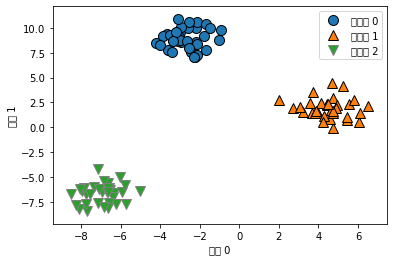

In [54]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

##이 데이터는 2차원데이터이며, 정규분포를 따른다. 

In [56]:
# LinearSVC()사용
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기 (3,)


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from c

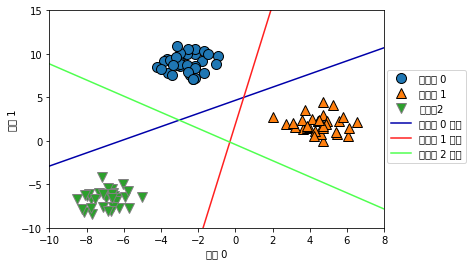

In [57]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c= color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1","클래스2", "클래스 0 경계", "클래스 1 경계","클래스 2 경계"], loc = (1.01, 0.3))

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44221 missing from c

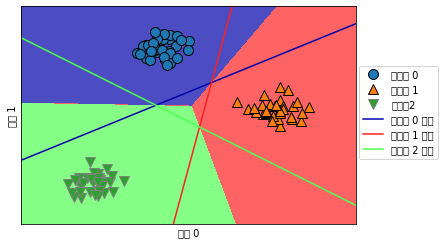

In [59]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha =.7)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c= color)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1","클래스2", "클래스 0 경계", "클래스 1 경계","클래스 2 경계"], loc = (1.01, 0.3))


+ 겹치는 부분은 가중치 합이 가장 높은 클래스로 선택하여 할당한다. (위 그림 참고)

